# Lab Assignment 1

**Computer Vision** - Term 5, 2023

Instructor: Dr. Saumya Jetley <br>
TAs: Ribhu Lahiri, Raghav Awasty

For reference: 
* Performing FFT on input images; to edit the frequency content and reconstruct (inverse transform) the image to observe its effect on the original  image
* Through this we’d like to understand the connection between information in the spatial domain and in the frequency domain, and how FFT helps to work between the two
* Frequency content and their relation to perception: https://stanford.edu/class/ee367/reading/OlivaTorralb_Hybrid_Siggraph06.pdf

### Part 1: Fast Fourier transformation of images

In [ ]:
# Imports
import cv2
import numpy as np
import pandas as pd
import scipy.fftpack as fp
import matplotlib.pyplot as plt

In [ ]:
# from fft_helper import *

In [ ]:
# # Reading in a sample image
# import gdown

# id = "1uN9K0gij30mw9RTnDNT0F4V5cst5NzKQ"
# gdown.download(id=id, output='bear.jpeg', quiet=True)

# id = '18RaIZacQo6wWpqN7Hm_MBgH8LQRc6Eu3'
# gdown.download(id=id, output='bean1.jpeg', quiet=True)

# id = '1CPMOPN_Hiv7nScv12ZMgUZOmXYNSyhbX'
# gdown.download(id=id, output='bean2.jpeg', quiet=True)

Instead of the standard images I will use my own image. 

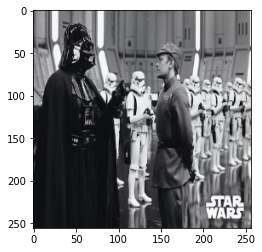

In [ ]:
#First we will resize the image and then we will visualise it

# Define the path of the image file
image_path = "/content/Vader.jpeg"

# Load the image from file
image = cv2.imread(image_path)

# Resize the image to 256x256
resized_image = cv2.resize(image, (256, 256))

# Display the resized image using matplotlib
plt.imshow(cv2.cvtColor(resized_image, cv2.COLOR_BGR2RGB))
plt.show()

In [ ]:
# Task 1.a: 1 point
def fft(a):
    ''' 
    Applies a fast Fourier transform to the given array.

    Parameters
    ----------
    a: PIL.Image or np.ndarray
        A PIL image object, or a numpy array representing the image.

    Returns
    -------
    b: np.ndarray
        A numpy array of the FFT-transformed image. N = len(x).
    '''

    # Check if array has only one element
    n = len(a)
    if n == 1:
        return a
    
    # Recursive calls to apply FFT on even and odd indices
    b_even = fft(a[::2])
    b_odd = fft(a[1::2])
    
    # Calculate the factor for FFT
    f = np.exp(-2j * np.pi * np.arange(n) / n)
    
    # Combine the FFT of even and odd indices
    b = np.concatenate(
        [b_even + f[:int(n/2)] * b_odd,
         b_even + f[int(n/2):] * b_odd]
    )
    
    return b


# Task 1.b: 1 point
def inv_fft(a):
    '''
    Inverts a Fourier transformed image back to an image.

    Parameters
    -----------
    a: np.ndarray
        An FFT-transformed image array.

    Returns:
    -----------------------
    b: np.ndarray
        A numpy array of the reconstructed image.
    '''
    
    # Check if array has only one element
    N = len(a)
    if N == 1:
        return a
    
    # Recursive calls to apply inverse FFT on even and odd indices
    b_even = inv_fft(a[::2])
    b_odd = inv_fft(a[1::2])
    
    # Calculate the factor for inverse FFT
    f = np.exp(2j * np.pi * np.arange(N) / N)
    
    # Combine the inverse FFT of even and odd indices
    b = np.concatenate(
        [b_even + f[:int(N/2)] * b_odd,
         b_even + f[int(N/2):] * b_odd]
    )
    
    # Normalize the output array
    b = b / N
    
    return b


# Task 1.c: 1 point
def fft_shift(a):
    '''
    Shifts the zero-frequency component to the center of the spectrum.

    Parameters
    -----------
    a: np.ndarray
        An FFT-transformed image array.

    Returns:
    -----------------------
    b: np.ndarray
        A numpy array of the shifted spectrum.
    '''
    
    # Get the dimensions of the input array
    m, n = a.shape
    
    # Calculate the indices for shifting
    p2 = (m + 1) // 2
    q2 = (n + 1) // 2
    
    # Create an empty array for the shifted image
    b = np.empty_like(a)
    
    # Shift the image by copying the appropriate parts
    b[:p2, :q2] = a[p2:, q2:]
    b[:p2, q2:] = a[p2:, :q2]
    b[p2:, :q2] = a[:p2, q2:]
    b[p2:, q2:] = a[:p2, :q2]
    
    return b



# Task 1.d: 1 point
def inv_fft_shift(a):
    '''
    Inverse shift to decentralize the origin.

    Parameters
    -----------
    a: np.ndarray
        A shifted FFT-transformed image array.

    Returns:
    -----------------------
    b: np.ndarray
        A numpy array of the decentralised spectrum.
    '''
    
    # Get the dimensions of the input array
    m, n = a.shape
    
    # Calculate the indices for inverse shifting
    shift_m = (m + 1) // 2
    shift_n = (n + 1) // 2
    
    # Create empty array for the inverse shifted image
    b = np.empty_like(a)
    
    # Inverse shift the image by copying the appropriate parts
    slice1 = slice(shift_m, m)
    slice2 = slice(0, shift_m)
    slice3 = slice(shift_n, n)
    slice4 = slice(0, shift_n)
    b[slice1, slice3] = a[slice2, slice4]
    b[slice1, slice4] = a[slice2, slice3]
    b[slice2, slice3] = a[slice1, slice4]
    b[slice2, slice4] = a[slice1, slice3]
    
    return b


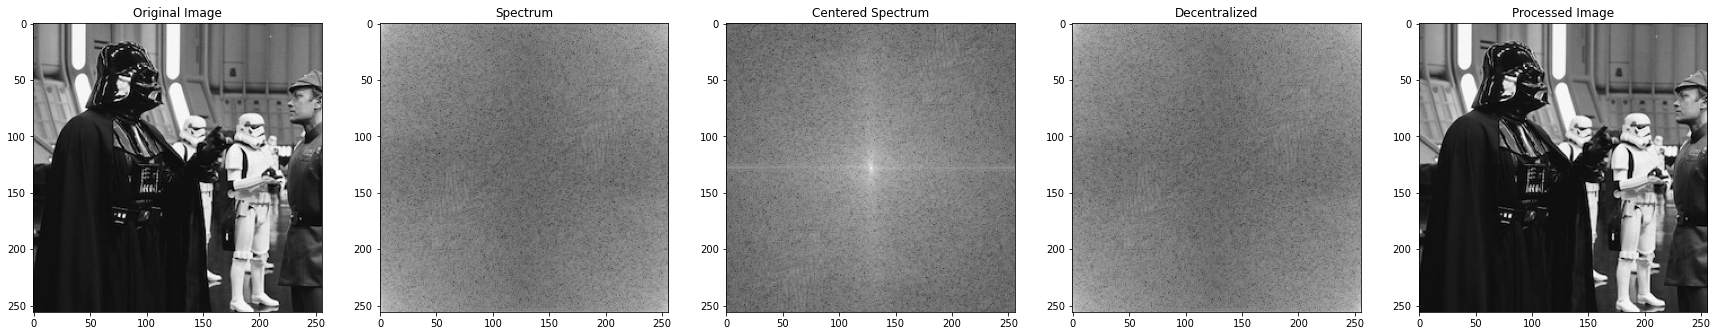

In [ ]:
plt.figure(figsize=(30, 20), constrained_layout=False)

img_c1 = cv2.imread("/content/Vader.jpeg", 0)
img_c1=img_c1[:256, :256]
img_c1_reshape= img_c1.flatten()
img_c2 = fft(img_c1_reshape)
img_c2=img_c2.reshape(256,256)
img_c3 = fft_shift(img_c2)
img_c4 = inv_fft_shift(img_c3)
img_c4_reshape=img_c4.flatten()
img_c5 = inv_fft(img_c4_reshape)
img_c5 = img_c5.reshape(256,256)

plt.subplot(151), plt.imshow(img_c1, "gray"), plt.title("Original Image")
plt.subplot(152), plt.imshow(np.log(np.abs(img_c2)), "gray"), plt.title("Spectrum");
plt.subplot(153), plt.imshow(np.log(np.abs(img_c3)), "gray"), plt.title("Centered Spectrum")
plt.subplot(154), plt.imshow(np.log(np.abs(img_c4)), "gray"), plt.title("Decentralized")
plt.subplot(155), plt.imshow(np.abs(img_c5), "gray"), plt.title("Processed Image")
plt.show()

### Part 2: Low pass and High pass filters

Low pass

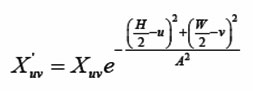

High pass

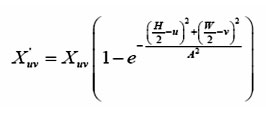

In [ ]:
# Feel free to create any helper functions

# Task 2.a: 1 point
def gaussian_low_pass(A, shape):
    '''
    Creates gaussian low pass filter for a given image

    Parameters
    -----------
    A: int
      A constant 
    
    shape: list or tuple
        The dimensions of the image (in 2D)

    Returns:
    -----------------------
    filter: np.ndarray
        A numpy array of the low pass filter
    '''
    filter_size = shape
    center = [shape[0] // 2, shape[1] // 2]
    # Initialize the filter with zeros.
    filter = np.zeros(filter_size)
    # Compute the standard deviation of the Gaussian function.
    std_dev = shape[0] / A
    # Compute the Gaussian function for each pixel of the filter.
    for i in range(filter_size[0]):
        for j in range(filter_size[1]):
            filter[i][j] = np.exp(-((i-center[0])**2 + (j-center[1])**2) / (2*std_dev**2))
    # Normalize the filter so that its values sum to 1.
    filter /= np.sum(filter)
    
    return filter
    
    

# Task 2.b: 1 point
def gaussian_high_pass(A, shape):
    '''
    Creates a high pass filter using a Gaussian filter for a given image.

    Parameters:
    -----------
    A: int
        A constant that controls the standard deviation of the Gaussian distribution
    shape: list or tuple
        The dimensions of the image (in 2D)

    Returns:
    -----------------------
    filter: np.ndarray
        A numpy array of the high pass filter
    '''

    # Extract dimensions of the filter
    filter_shape = shape
    
    # Calculate the center of the filter
    center = [shape[0] // 2, shape[1] // 2]

    # Initialize the filter to all zeros
    filter = np.zeros(filter_shape)

    # Calculate the standard deviation of the Gaussian distribution
    std_dev = shape[0] / A

    # Iterate over each pixel in the filter
    for i in range(filter_shape[0]):
        for j in range(filter_shape[1]):
            # Calculate the distance of each pixel from the center of the filter
            distance = ((i-center[0])**2 + (j-center[1])**2)
            # Calculate the value of the filter at this pixel using a Gaussian distribution
            filter[i][j] = 1 - np.exp(-distance / (2*std_dev**2))

    # Normalize the filter so that the sum of all elements is 1
    filter /= np.sum(filter)
    
    return filter


<ipython-input-17-bc922d36e82a>:28: RuntimeWarning: divide by zero encountered in log
  plt.subplot(236), plt.imshow(np.log(np.abs(HPcenter)), "gray"), plt.title("Shifted High Pass FFT")


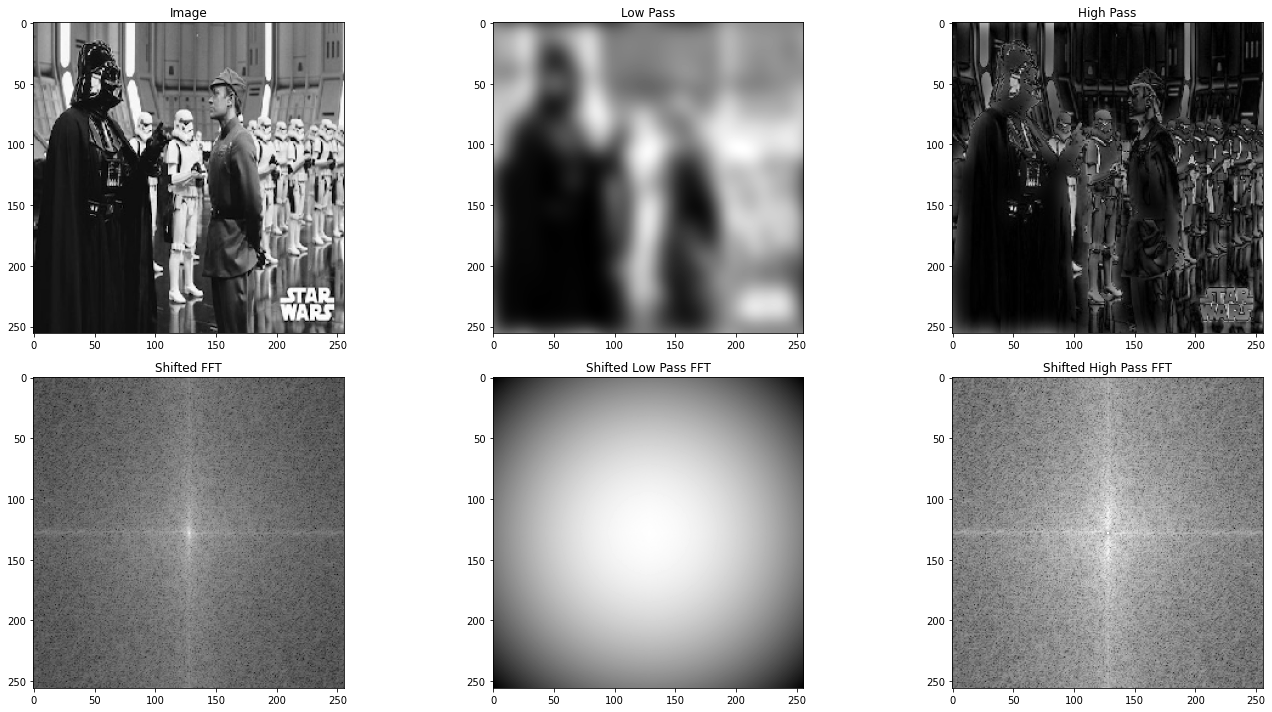

In [ ]:
img = cv2.imread('/content/Vader.jpeg', 0)
img = cv2.resize(img, (256, 256), interpolation = cv2.INTER_NEAREST)
img_flat=img.flatten()
original = fft(img_flat)
original=original.reshape(256,256)
shifted = fft_shift(original)

# Finding the low pass frequency output and its corresponding invert
LPcenter = shifted * gaussian_low_pass(50, img.shape)
low_pass = inv_fft_shift(LPcenter)
low_pass=low_pass.flatten()
inverse_low_pass = inv_fft(low_pass)
inverse_low_pass_reshape=inverse_low_pass.reshape(256,256)

# Finding the high pass frequency output and its corresponding invert
HPcenter = shifted * gaussian_high_pass(50, img.shape)
high_pass = inv_fft_shift(HPcenter)
high_pass=high_pass.flatten()
inverse_high_pass = inv_fft(high_pass)
inverse_high_pass_reshape=inverse_high_pass.reshape(256,256)

plt.figure(figsize=(20, 10), constrained_layout=False)
plt.subplot(231), plt.imshow(img, "gray"), plt.title("Image")
plt.subplot(232), plt.imshow(np.abs(inverse_low_pass_reshape), "gray"), plt.title("Low Pass")
plt.subplot(233), plt.imshow(np.abs(inverse_high_pass_reshape), "gray"), plt.title("High Pass")
plt.subplot(234), plt.imshow(np.log(np.abs(shifted)), "gray"), plt.title("Shifted FFT")
plt.subplot(235), plt.imshow(np.log(np.abs(LPcenter)), "gray"), plt.title("Shifted Low Pass FFT")
plt.subplot(236), plt.imshow(np.log(np.abs(HPcenter)), "gray"), plt.title("Shifted High Pass FFT")
plt.tight_layout()
plt.show();

### Part 3: Filters in the FFT domain

In [ ]:
def filter(mask, image):
    return mask * image

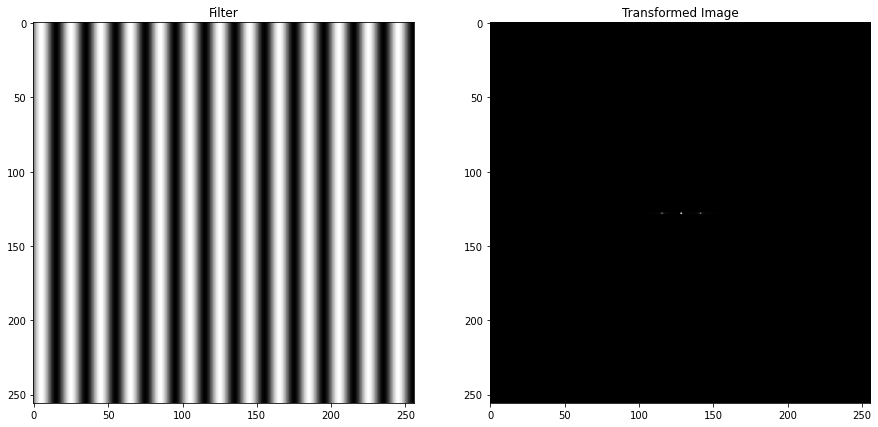

In [ ]:
x = np.arange(shifted.shape[1])  # generate 1-D sine wave of required period 
y = np.sin(2 * np.pi * x / 20)

y += max(y)

mask = np.array([[y[j]*127 for j in range(shifted.shape[1])] for i in range(shifted.shape[0])], dtype=np.uint8)

masked = filter(mask, shifted)
fft_mask = fft_shift(fft(mask))
inv_mask = inv_fft_shift(masked)
invert = inv_fft(inv_mask)

plt.figure(figsize=(15, 10), constrained_layout=False)
plt.subplot(121), plt.imshow(mask, "gray"), plt.title("Filter")
plt.subplot(122), plt.imshow(np.abs(fft_mask), "gray"), plt.title("Transformed Image")
plt.show()

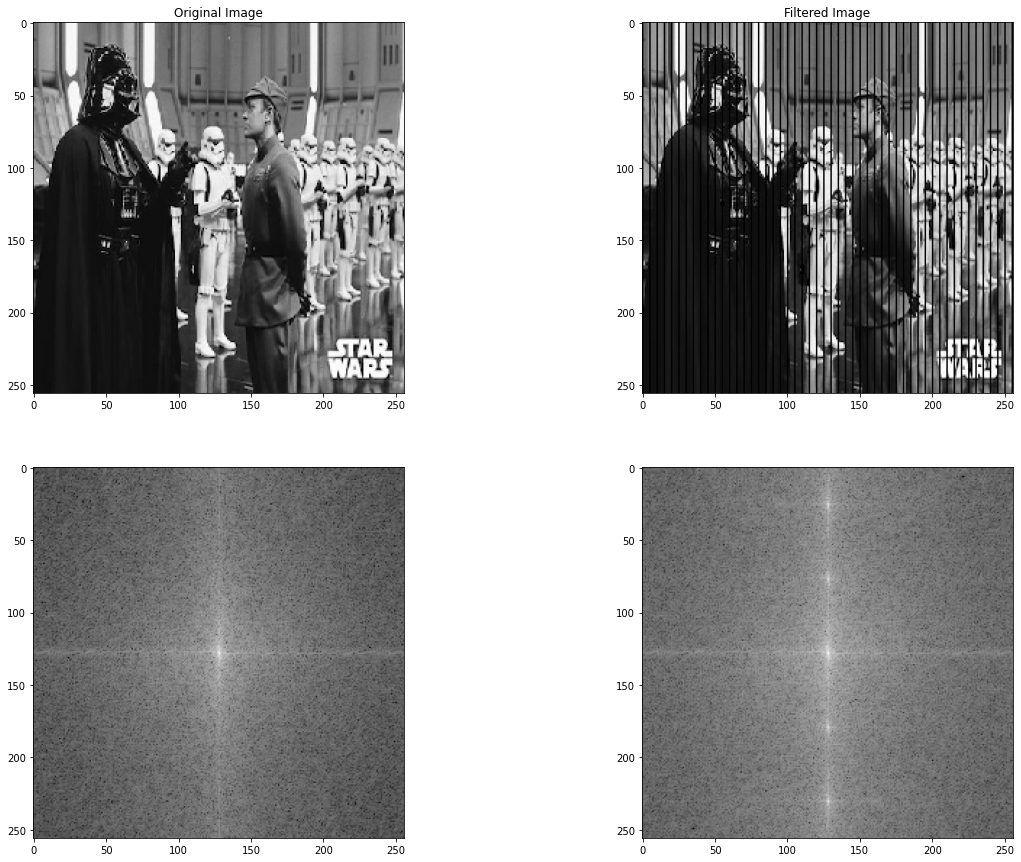

In [ ]:
mask = np.ones(img.shape)

for i in range(img.shape[0]):
    for j in range(0, img.shape[1], 5):
        mask[i][j] = 0

filter_img = filter(mask, img)
filter_img_flat=filter_img.flatten()
fft_filtered_img = fft(filter_img_flat)
fft_filtered = fft_shift(fft_filtered_img.reshape(256,256))

fft_img = fft(img.flatten())
fft_center = fft_shift(fft_img.reshape(256,256))

plt.figure(figsize=(20, 15), constrained_layout=False)

plt.subplot(221), plt.imshow(np.abs(img), 'gray'), plt.title('Original Image')
plt.subplot(222), plt.imshow(np.abs(filter_img), 'gray'), plt.title('Filtered Image')
plt.subplot(223), plt.imshow(np.log(1+np.abs(fft_center)), 'gray')
plt.subplot(224), plt.imshow(np.log(1+np.abs(fft_filtered)), 'gray')
plt.show()

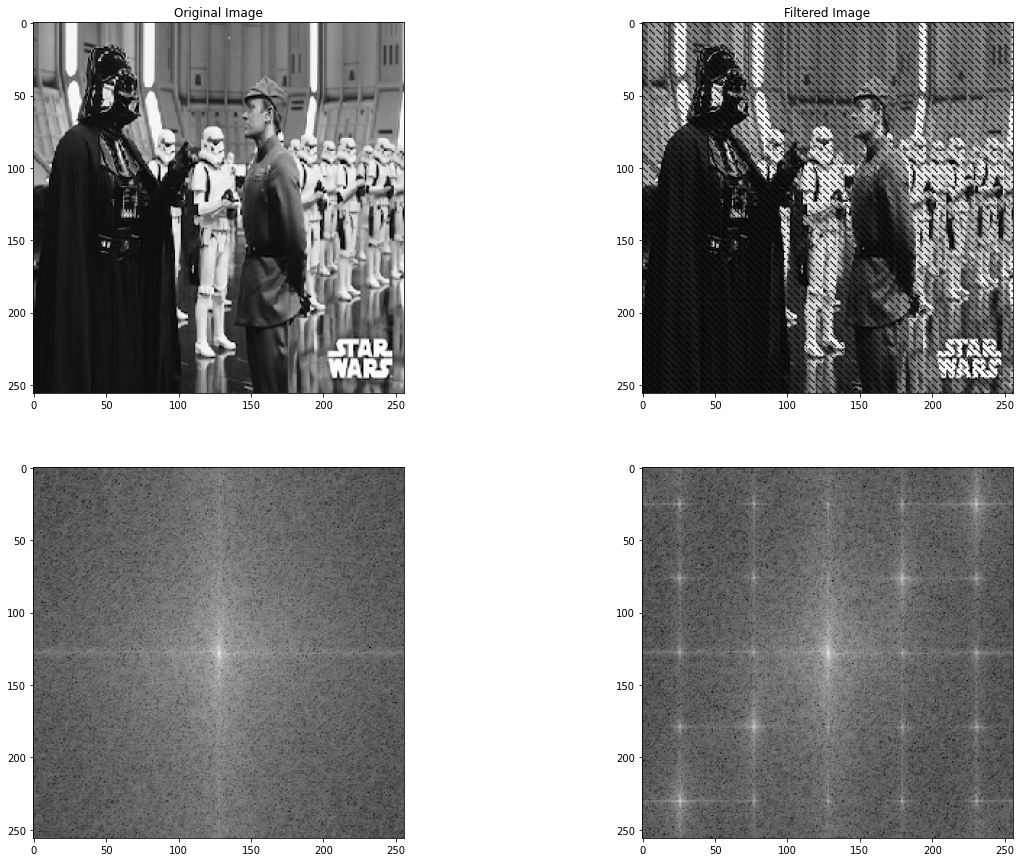

In [ ]:
mask = np.ones(img.shape)

for size in range(4):
    for i in range(size, img.shape[0], 5):
        for j in range(size,img.shape[1], 5):
            mask[i][j] = 0

filter_img = filter(mask, img)
fft_filtered_img = fft(filter_img.flatten())
fft_filtered = fft_shift(fft_filtered_img.reshape(256,256))

fft_img = fft(img.flatten())
fft_center = fft_shift(fft_img.reshape(256,256))

plt.figure(figsize=(20, 15), constrained_layout=False)

plt.subplot(221), plt.imshow(np.abs(img), 'gray'), plt.title('Original Image')
plt.subplot(222), plt.imshow(np.abs(filter_img), 'gray'), plt.title('Filtered Image')
plt.subplot(223), plt.imshow(np.log(1+np.abs(fft_center)), 'gray')
plt.subplot(224), plt.imshow(np.log(1+np.abs(fft_filtered)), 'gray')
plt.show()